In [14]:
import math
import matplotlib.pyplot as plt

from library.matrix import Matrix
from library.basic_functions import truncate_to_decimal_places

# Q1:

**Solve exp(−x) − x = 0 using fixed-point method, accurate up to 4 places in decimal.**

$$
e^{-x} -x = 0
$$

Solving the given equation is equivalent to solving this equation:
$$
x = e^{-x}
$$

according to the fixed point method, let our function $\phi(x)$ be:

$$
\phi(x) = e^{-x}
$$

**Note:** The used `Eqn.fixed_point_iteration` function can be found in the [equation.jl](../library/equation.jl) file.

In [15]:
from library.nonlinear_equations import fixed_point_iteration

def phi(x):
    return math.exp(-x)

ans = fixed_point_iteration(phi, 1)
print(f"Fixed point iteration: {truncate_to_decimal_places(ans, 4)}")

Fixed point iteration: 0.5671


# Q2

Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal

$$
\int_0^1 \sqrt{1+x^4} dx
$$

In [16]:
from library.integration import simpson_rule, gaussian_quadrature

def f(x):
    return math.sqrt(1 + x**4)

simp = simpson_rule(f, 0, 1, 4)
print(f"Simpson's rule: {truncate_to_decimal_places(simp, 6)}")

gquad = gaussian_quadrature(f, 0, 1, n=5)
print(f"Gaussian quadrature: {truncate_to_decimal_places(gquad, 6)}")

Simpson's rule: 1.089429
Gaussian quadrature: 1.089428


# Q3
Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01

$$
\frac{dy}{dx} = \frac{5x^2 - y}{e^{x+y}}
$$

where $y(0) = 1$

Tabulate the results.

h = 0.01 -> 1.071577
h = 0.05 -> 1.071577
h = 0.2 -> 1.071585
h = 0.5 -> 1.071926


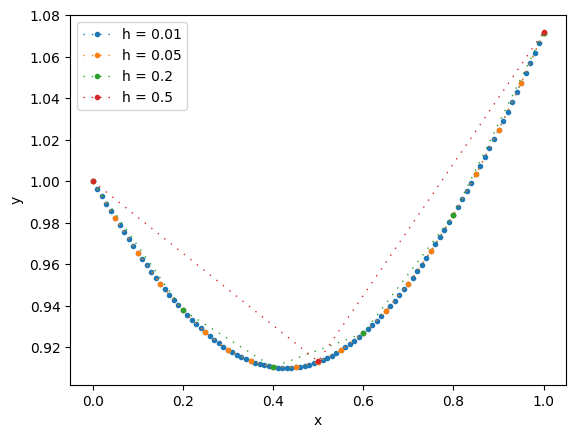

In [17]:
from library.diffeq import rk4

def f(x, y):
    return (5*x**2 - y) / math.exp(x + y)

upto_x = 1

xs, ys, y0 = rk4(f, upto_x, x0=0, y0=1, h = 0.01)
plt.plot(xs, ys, label="h = 0.01", linewidth=1, linestyle=(0, (1, 5)), marker=".")
print(f"h = 0.01 -> {truncate_to_decimal_places(y0, 6)}")

xs, ys, y0 = rk4(f, upto_x, x0=0, y0=1, h = 0.05)
plt.plot(xs, ys, label="h = 0.05", linewidth=1, linestyle=(0, (1, 5)), marker=".")
print(f"h = 0.05 -> {truncate_to_decimal_places(y0, 6)}")

xs, ys, y0 = rk4(f, upto_x, x0=0, y0=1, h = 0.2)
plt.plot(xs, ys, label="h = 0.2", linewidth=1, linestyle=(0, (1, 5)), marker=".")
print(f"h = 0.2 -> {truncate_to_decimal_places(y0, 6)}")

xs, ys, y0 = rk4(f, upto_x, x0=0, y0=1, h = 0.5)
plt.plot(xs, ys, label="h = 0.5", linewidth=1, linestyle=(0, (1, 5)), marker=".")
print(f"h = 0.5 -> {truncate_to_decimal_places(y0, 6)}")


plt.xlabel("x")
plt.ylabel("y")
plt.legend()

**Note:** I didn't understand what is meant by "Tabulate the results", so I just plotted the graph. Incase a $x_{final}$ had been mentioned, we could have printed the value of $y_{final}=f(x_{final})$ for each interval size. But since it wasn't mentioned, I included the graph of the function with the table of the $x_{final}$ which I used.

|   interval sizes   | $x_{final} = 1$ |
|:------------------:|:-----------:|
|       0.5          |  1.071926   |
|       0.2          |  1.071585   |
|       0.05         |  1.071577   |
|       0.01         |  1.071577   |

- the lines are in dotted lines because we are not sure about those points

# Q4

Solve the heat equation $u_t= 4u_xx$, using Crank-Nicolson and your choice of $\alpha$, subjected to the boundary conditions:

$$u(0,t) = 0$$
$$u(8,t) = 0$$
$$u(x,0) = 4x −x^2/2$$

Since matrix inversion is not taught in class, you may use ready-made available routines for the purpose. Comment on your choice of $\alpha$ and inversion algorithm. Display the solution both in a table and a contour plot.

In [18]:
from library.diffeq import crank_nicolson_heat_eqn
import numpy as np  # used linspace

In [19]:
L = 8
T = 1
Nl = 500
Nt = 500
alpha_scale = 2

x = np.linspace(0, 8, Nl + 1)
time = np.linspace(0, T, Nt + 1)
u0 = 4*x - x**2/2

u, alpha = crank_nicolson_heat_eqn(u0, L, T, Nl, Nt, alpha_scale, v=4)
print(f"Chosen {alpha = }")

Chosen alpha = 15.625000000000002


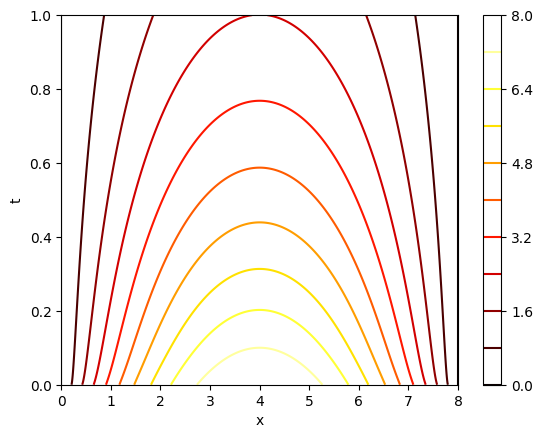

In [20]:
plt.contour(*np.meshgrid(x, time), u, 10, cmap="hot")
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

**Choice of $\alpha$:** Cranck-Nicolson method is unconditionally stable, so we can choose any value of $\alpha$.

**Solution in a Table:**

In [21]:
print("* all values of x are not shown, only 10 equally spaced values are shown for brevity")
p = lambda x: truncate_to_decimal_places(x, 4)
print(f"|  x   | t={time[0]:.2f} | t={time[100]:.2f} | t={time[200]:.2f} | ... |  t={time[-1]} |")
print( "|------|--------|--------|--------|-----|--------|")
for i in range(0, Nl+1, 50):
    print(f"| {x[i]:.2f} | {p(u[0, i]):.4f} | {p(u[100, i]):.4f} | {p(u[200, i]):.4f} | ... | {p(u[-1, i]):.4f} |")

* all values of x are not shown, only 10 equally spaced values are shown for brevity
|  x   | t=0.00 | t=0.20 | t=0.40 | ... |  t=1.0 |
|------|--------|--------|--------|-----|--------|
| 0.00 | 0.0000 | 0.0000 | 0.0000 | ... | 0.0000 |
| 0.80 | 2.8800 | 2.0204 | 1.5605 | ... | 0.7429 |
| 1.60 | 5.1200 | 3.8234 | 2.9661 | ... | 1.4132 |
| 2.40 | 6.7200 | 5.2291 | 4.0789 | ... | 1.9451 |
| 3.20 | 7.6800 | 6.1158 | 4.7917 | ... | 2.2866 |
| 4.00 | 8.0000 | 6.4180 | 5.0369 | ... | 2.4043 |
| 4.80 | 7.6800 | 6.1158 | 4.7917 | ... | 2.2866 |
| 5.60 | 6.7199 | 5.2291 | 4.0789 | ... | 1.9451 |
| 6.40 | 5.1199 | 3.8234 | 2.9661 | ... | 1.4132 |
| 7.20 | 2.8799 | 2.0204 | 1.5605 | ... | 0.7429 |
| 8.00 | 0.0000 | 0.0000 | 0.0000 | ... | 0.0000 |


# Q5

Solve the Poisson’s equation $u_{xx}+u_{yy}= xe^y$ in a $6^2$ grid with boundary conditions

- $u(0,y) = 0$
- $u(2,y) = 2e^y$
- $u(x,0) = x$
- $u(x,1) = xe$

Display the solution both in a table and a 3-D plot.

In [22]:
from library.diffeq import poission_eqn

In [27]:
N = 6
h = 1 / (N - 1)
x = np.linspace(0, 2, N)
y = np.linspace(0, 1, N)

# preparing u with boundary conditions
u = np.zeros((N, N))
for i in range(N):
    u[0, i] = 0  # Upper Boundary
    u[N-1, i] = 2 * np.exp(y[i])
    u[i, 0] = x[i]  # Left Boundary
    u[i, N-1] = x[i] * np.e

In [28]:
u1 = poission_eqn(u, lambda x, y: - x * np.exp(y))
# u = poission_eqn(u, lambda x, y: 0)

In [29]:
# Display as a table
print(Matrix(u, "u").__str__(4))

u = |0.0000  0.4000  0.8000  1.2000  1.6000  2.0000|
    |0.0000  0.5375  1.0631  1.5609  2.0044  2.3409|
    |0.0000  0.6674  1.3150  1.9174  2.4375  2.8189|
    |0.0000  0.7934  1.5643  2.2845  2.9141  3.3942|
    |0.0000  0.9127  1.8060  2.6550  3.4234  4.0537|
    |0.0000  1.0160  2.0207  2.9991  3.9285  4.7682|



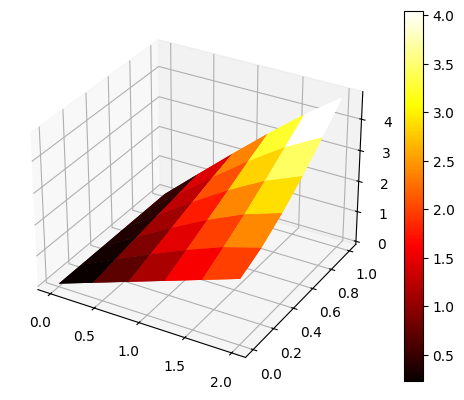

In [30]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(*np.meshgrid(x, y), u, cmap='hot')
plt.colorbar(ax.plot_surface(*np.meshgrid(x, y), u, cmap='hot'))